# DNBLab Workshop: Daten bereinigen und zusammenführen

# Part 3: Datenanalyse & Visualisierung

## Einrichten der Arbeitsumgebung

Um die Arbeitsumgebung für die folgenden Schritte passend einzurichten, sollten zunächst die benötigten Python-Bibliotheken importiert werden. Für Anfragen über die SRU-Schnittstelle wird Requests https://docs.python-requests.org/en/latest/ und zur Verarbeitung der XML-Daten etree https://docs.python.org/3/library/xml.etree.elementtree.html verwendet. Mit Pandas https://pandas.pydata.org/ können Elemente aus dem MARC21-Format ausgelesen werden.

In [1]:
import requests
from bs4 import BeautifulSoup as soup
import unicodedata
from lxml import etree
import pandas as pd
import matplotlib.pyplot as plt

## Daten einlesen

Nachdem die Daten bereinigt und mit Daten aus der GND angereichert wurden, führen wir eine exemplarische Analyse auf unsere angereicherten Daten durch. Zuerst wird die .csv Datei importiert und als Dataframe ausgegeben. Der Dataframe bildet die Basis der weiteren Bearbeitungen. 

In [7]:
import pandas as pd

# Annahme: Die Datei "deine_datei.csv" befindet sich im selben Verzeichnis wie dein Notebook
# Passe den Dateinamen entsprechend an
filename = 'Klassik-csv-csv-csv (2).csv' # Fügen Sie hier Ihren gewählten Dateinamen ein. 

# Daten aus der CSV-Datei in DataFrame laden
df = pd.read_csv(filename)

df


,idn,titel,jahr,verfasser 1,verfasser 2,gnd_id,Geburtsdatum,Geburtsort,Beruf oder Beschäftigung,urn,verlag,verlagsort
0,1003104487,Egmont,1946.0,Goethe,Johann Wolfgang von,118540238,1749-08-28,Frankfurt am Main,Schriftsteller,https://nbn-resolving.org/urn:nbn:de:101:2-201...,Schöningh,Paderborn
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Publizist,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Politiker,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jurist,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Naturwissenschaftler,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Philologe,NaN,NaN,NaN
518,1000778517,Die drei gerechten Kammacher,1903.0,Keller,Gottfried,11856109X,1819-07-19,Zürich,Schriftsteller,https://nbn-resolving.org/urn:nbn:de:101:2-201...,Cotta,Stuttgart
519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Librettist,NaN,NaN,NaN
520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maler,NaN,NaN,NaN


## Vertretene AutorInnen

Zuerst soll herausgefunden werden, welche AutorInnen mit wie vielen Werken in dem Datenset vorhanden sind. Dazu zählen wir die values in dem gegebenen Dataframe. 

In [24]:
# Anzahl der Werke pro AutorIn zählen und in ein DataFrame konvertieren
anzahl_werke_pro_autor_df = pd.DataFrame(df['verfasser 1'].value_counts())

# Umbenennen der Spalte in 'Anzahl der Werke'
anzahl_werke_pro_autor_df.columns = ['Anzahl der Werke']

# Anzeige des DataFrame
print("Anzahl der Werke pro AutorIn:")
print(anzahl_werke_pro_autor_df)

Anzahl der Werke pro AutorIn:
                  Anzahl der Werke
Kleist                           7
Goethe                           6
Fontane                          6
Hoffmann                         5
Meyer                            5
Keller                           5
Eichendorff                      4
Storm                            4
Schiller                         4
Stifter                          3
Wassermann                       3
Mörike                           3
Gotthelf                         3
Tieck                            2
Anzengruber                      2
Grabbe                           2
Schnitzler                       2
Droste-Hülshoff                  2
Lessing                          2
Ebner-Eschenbach                 2
Hebbel                           2
Hofmannsthal                     2
Raabe                            2
Trakl                            1
Marlitt                          1
Wedekind                         1
Jean Paul                

## Erscheinungsjahre visualisieren 

Die Erscheinungsjahre der Publikationen sollen grafisch dargestellt werden.
Testen Sie, was passiert, wenn Sie die Werte unter plt.figure(figsize=(15, 8)) & plt.hist(years, bins=50, ändern. 

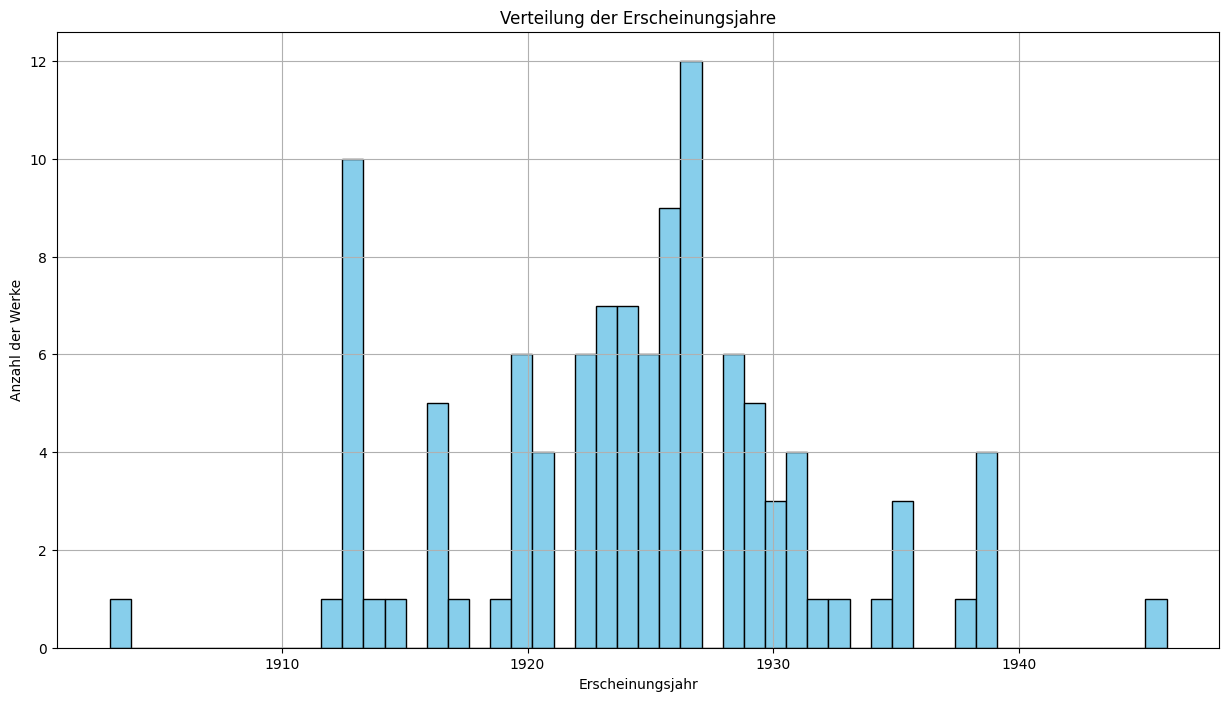

In [22]:
# Erscheinungsjahre aus der Spalte 'jahr' im DataFrame df extrahieren
years = df['jahr']

# Histogramm erstellen
plt.figure(figsize=(15, 8)) # definiert die Größe des Diagramms 
plt.hist(years, bins=50, color='skyblue', edgecolor='black')  # Anzahl der Bins anpassen, um die gewünschte Granularität zu erreichen
plt.title('Verteilung der Erscheinungsjahre')
plt.xlabel('Erscheinungsjahr')
plt.ylabel('Anzahl der Werke')
plt.grid(True)
plt.show()


# Berufe visualisieren 

Was sind die 10 häufigsten Berufe, die unsere enthaltenen AutorInnen ausleben? Dazu können wir mit der matplotlib.pyplot ein Kreisdiagramm erstellen. Aufgrund der Diversität der Berufe wird der Datenbestand auf die Top 10 Berufe beschränkt. 
Im Codefeld beruf_beschaeftigung_counts = df['Beruf oder Beschäftigung'].value_counts().head(10) lässt sich der Wert 10 beliebig anpassen. Hier sollte man jedoch die Übersichtlichkeit beachten. 

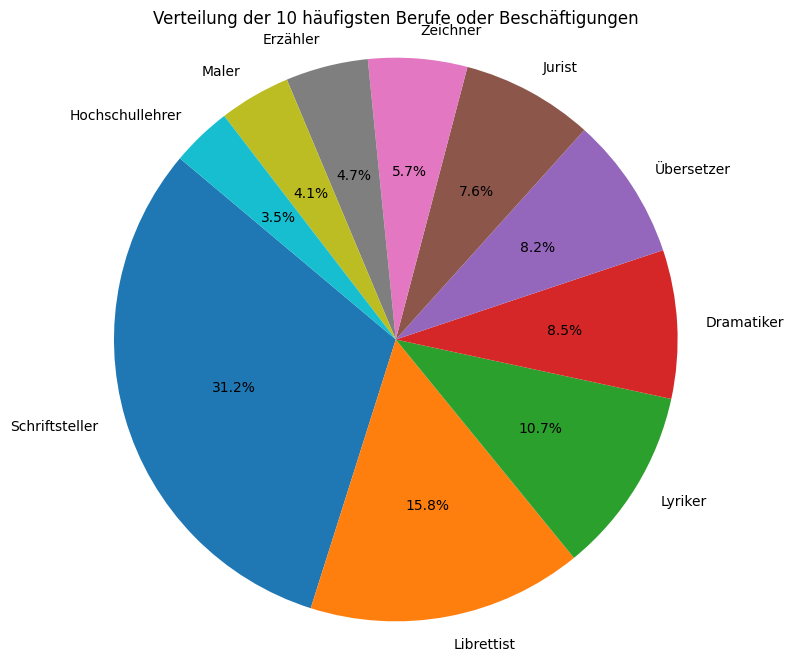

In [24]:
# Beruf oder Beschäftigung
beruf_beschaeftigung_counts = df['Beruf oder Beschäftigung'].value_counts().head(10)  # Nur die 10 häufigsten Werte

# Kreisdiagramm erstellen
plt.figure(figsize=(8, 8))
plt.pie(beruf_beschaeftigung_counts, labels=beruf_beschaeftigung_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Verteilung der 10 häufigsten Berufe oder Beschäftigungen')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
